In [ ]:
!nvidia-smi

Wed Jun  5 08:37:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# !pip install ultralytics
# !pip install roboflow

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display,Image

In [1]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="*****")
# project = rf.workspace("*****").project("traffic-sign-guy19")
# version = project.version(1)
# dataset = version.download("yolov8")

In [ ]:
!yolo task =detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=8 imgsz=640

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/traffic-sign-1/data.yaml, epochs=8, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

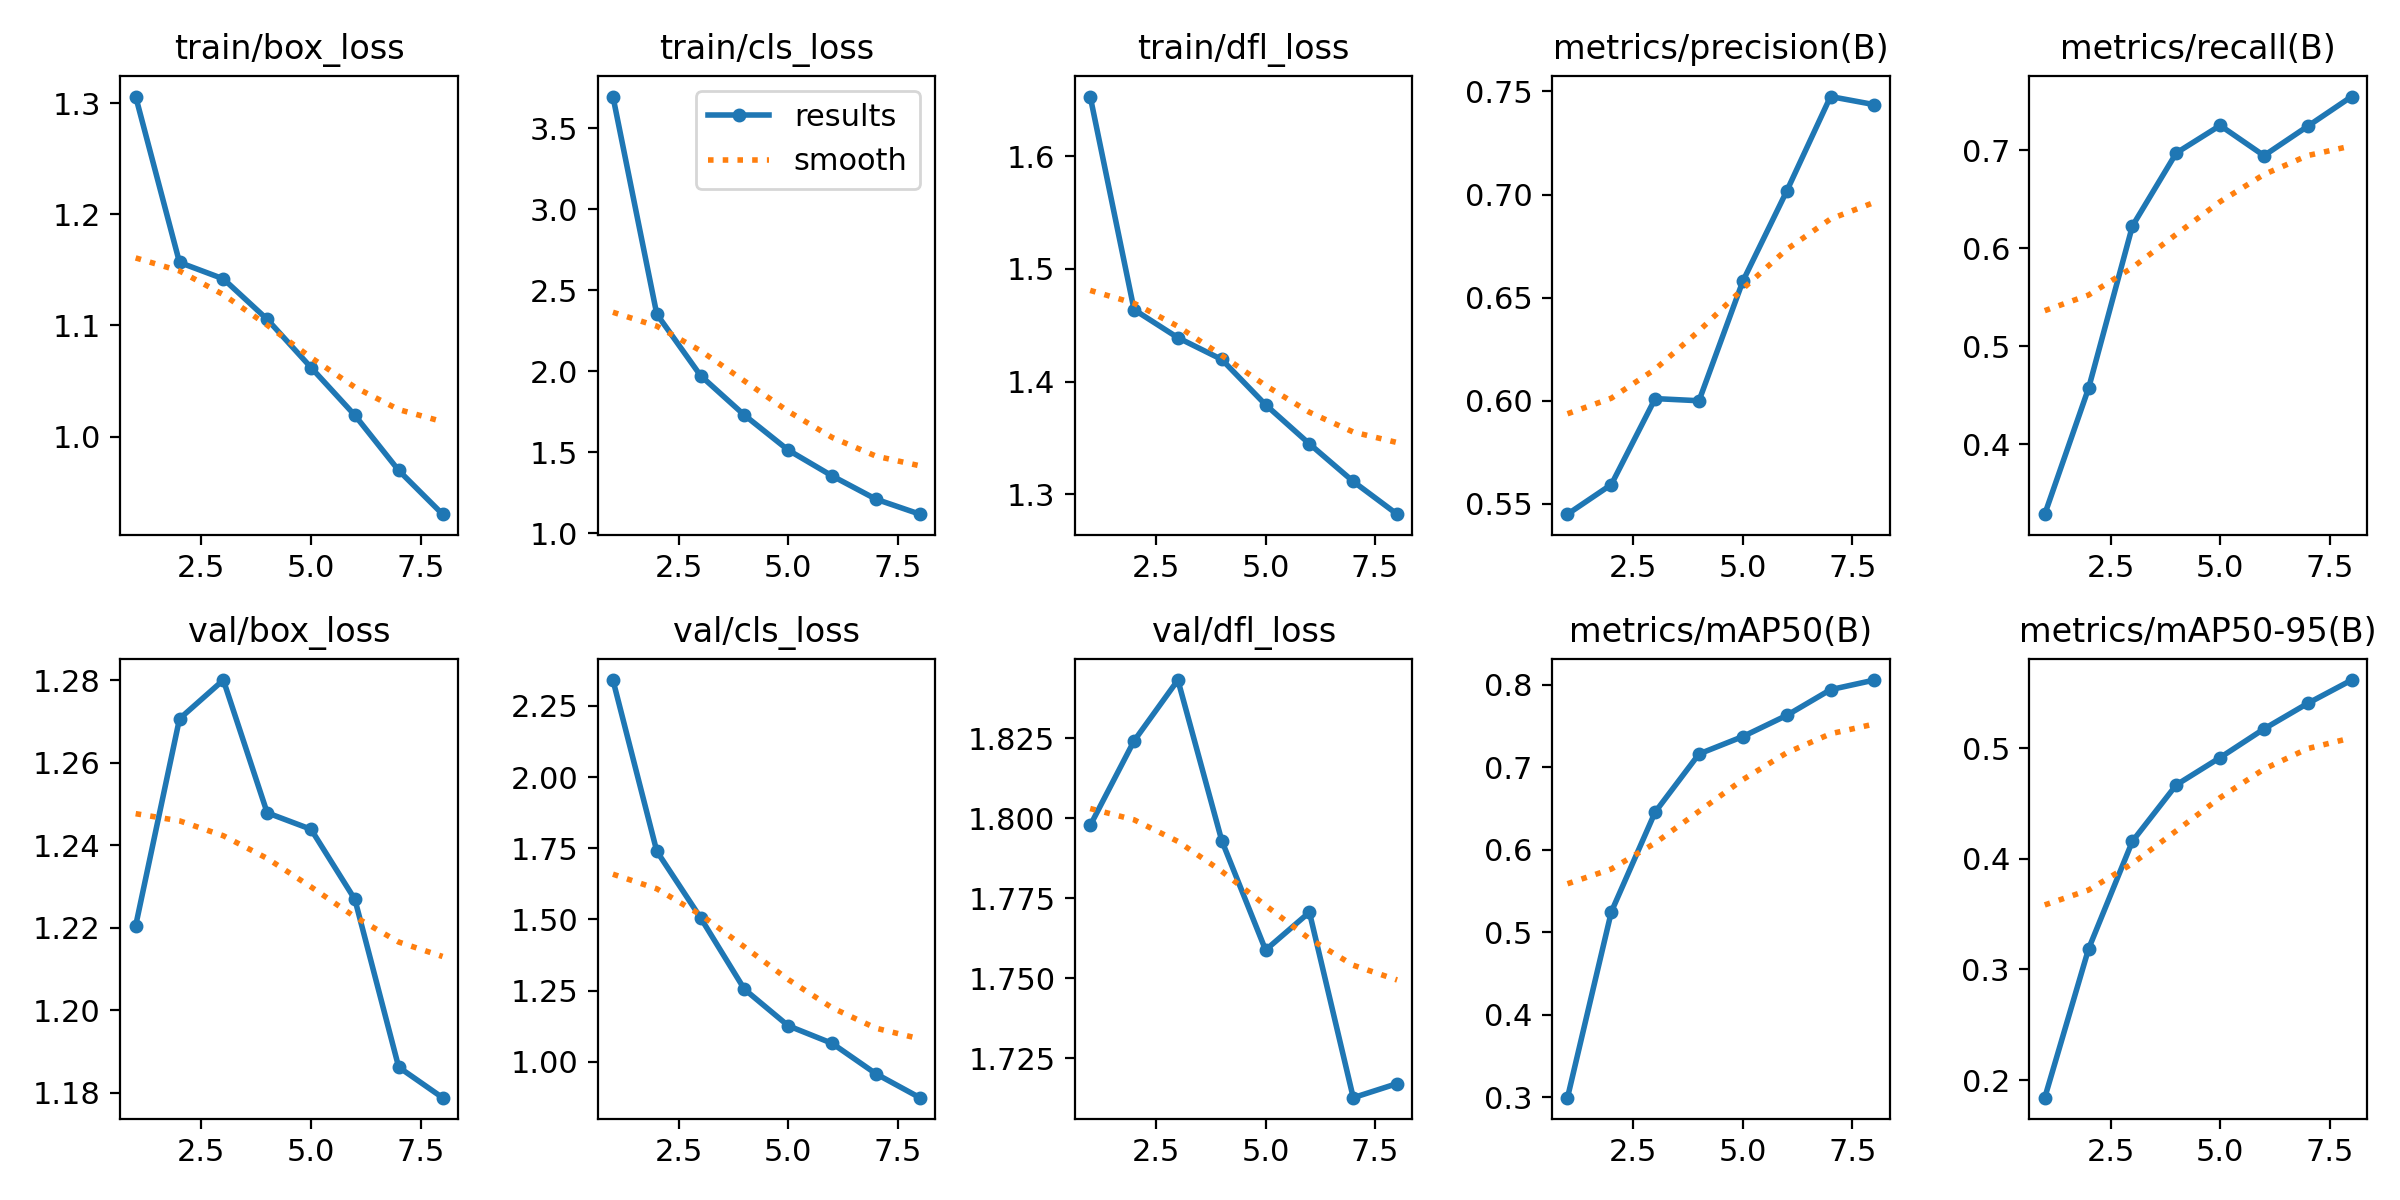

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png')

In [ ]:
!yolo task =detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25882606 parameters, 0 gradients, 78.9 GFLOPs
val: Scanning /content/traffic-sign-1/valid/labels.cache... 763 images, 3 backgrounds, 0 corrupt: 100% 763/763 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:19<00:00,  2.44it/s]
                   all        763        859      0.743      0.757      0.808      0.564
                     -          1          1          0          0          0          0
                     0        100        178      0.809      0.787      0.851      0.456
         Barrier Ahead         15         15      0.923      0.933      0.952      0.868
                Cattle          3          3      0.881          1      0.995      0.712
               Caution          1          1      0.278      0.834      0.332      0.232
        Cycle Crossing         11         11

In [ ]:
!yolo task =detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.4 source={dataset.location}/test/images

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25882606 parameters, 0 gradients, 78.9 GFLOPs

image 1/807 /content/traffic-sign-1/test/images/BA-10-_jpg.rf.ff29fbc14985b68d49a966d8e94b17c8.jpg: 576x640 1 Barrier Ahead, 182.5ms
image 2/807 /content/traffic-sign-1/test/images/BA-11-_png.rf.3696abfe5d37785c924270ee9a14ba3b.jpg: 640x640 (no detections), 38.7ms
image 3/807 /content/traffic-sign-1/test/images/BA-12-_jpg.rf.39f52d993baedbebe0d4df073b4ef745.jpg: 640x640 1 Barrier Ahead, 37.3ms
image 4/807 /content/traffic-sign-1/test/images/BA-13-_png.rf.a1d927183b968fab00e94adb77ad1f05.jpg: 640x640 1 Barrier Ahead, 37.3ms
image 5/807 /content/traffic-sign-1/test/images/BA-16-_png.rf.46d61344e19c33f9b45e8897c01f709e.jpg: 640x640 1 Barrier Ahead, 37.4ms
image 6/807 /content/traffic-sign-1/test/images/BA-20-_png.rf.64f3a4537dbed50239612359fe563c01.jpg: 640x640 1 Barrier Ahead, 37.3ms
image 7/807 /content/traffic-sign-1/te

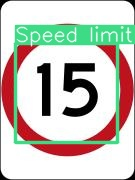

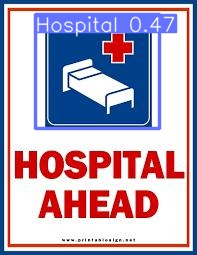

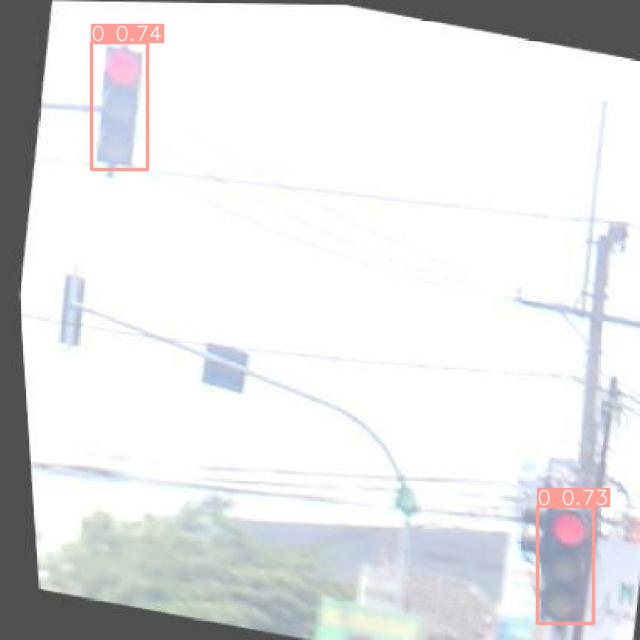

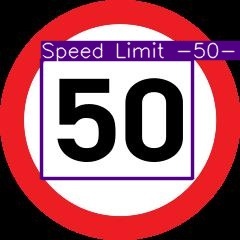

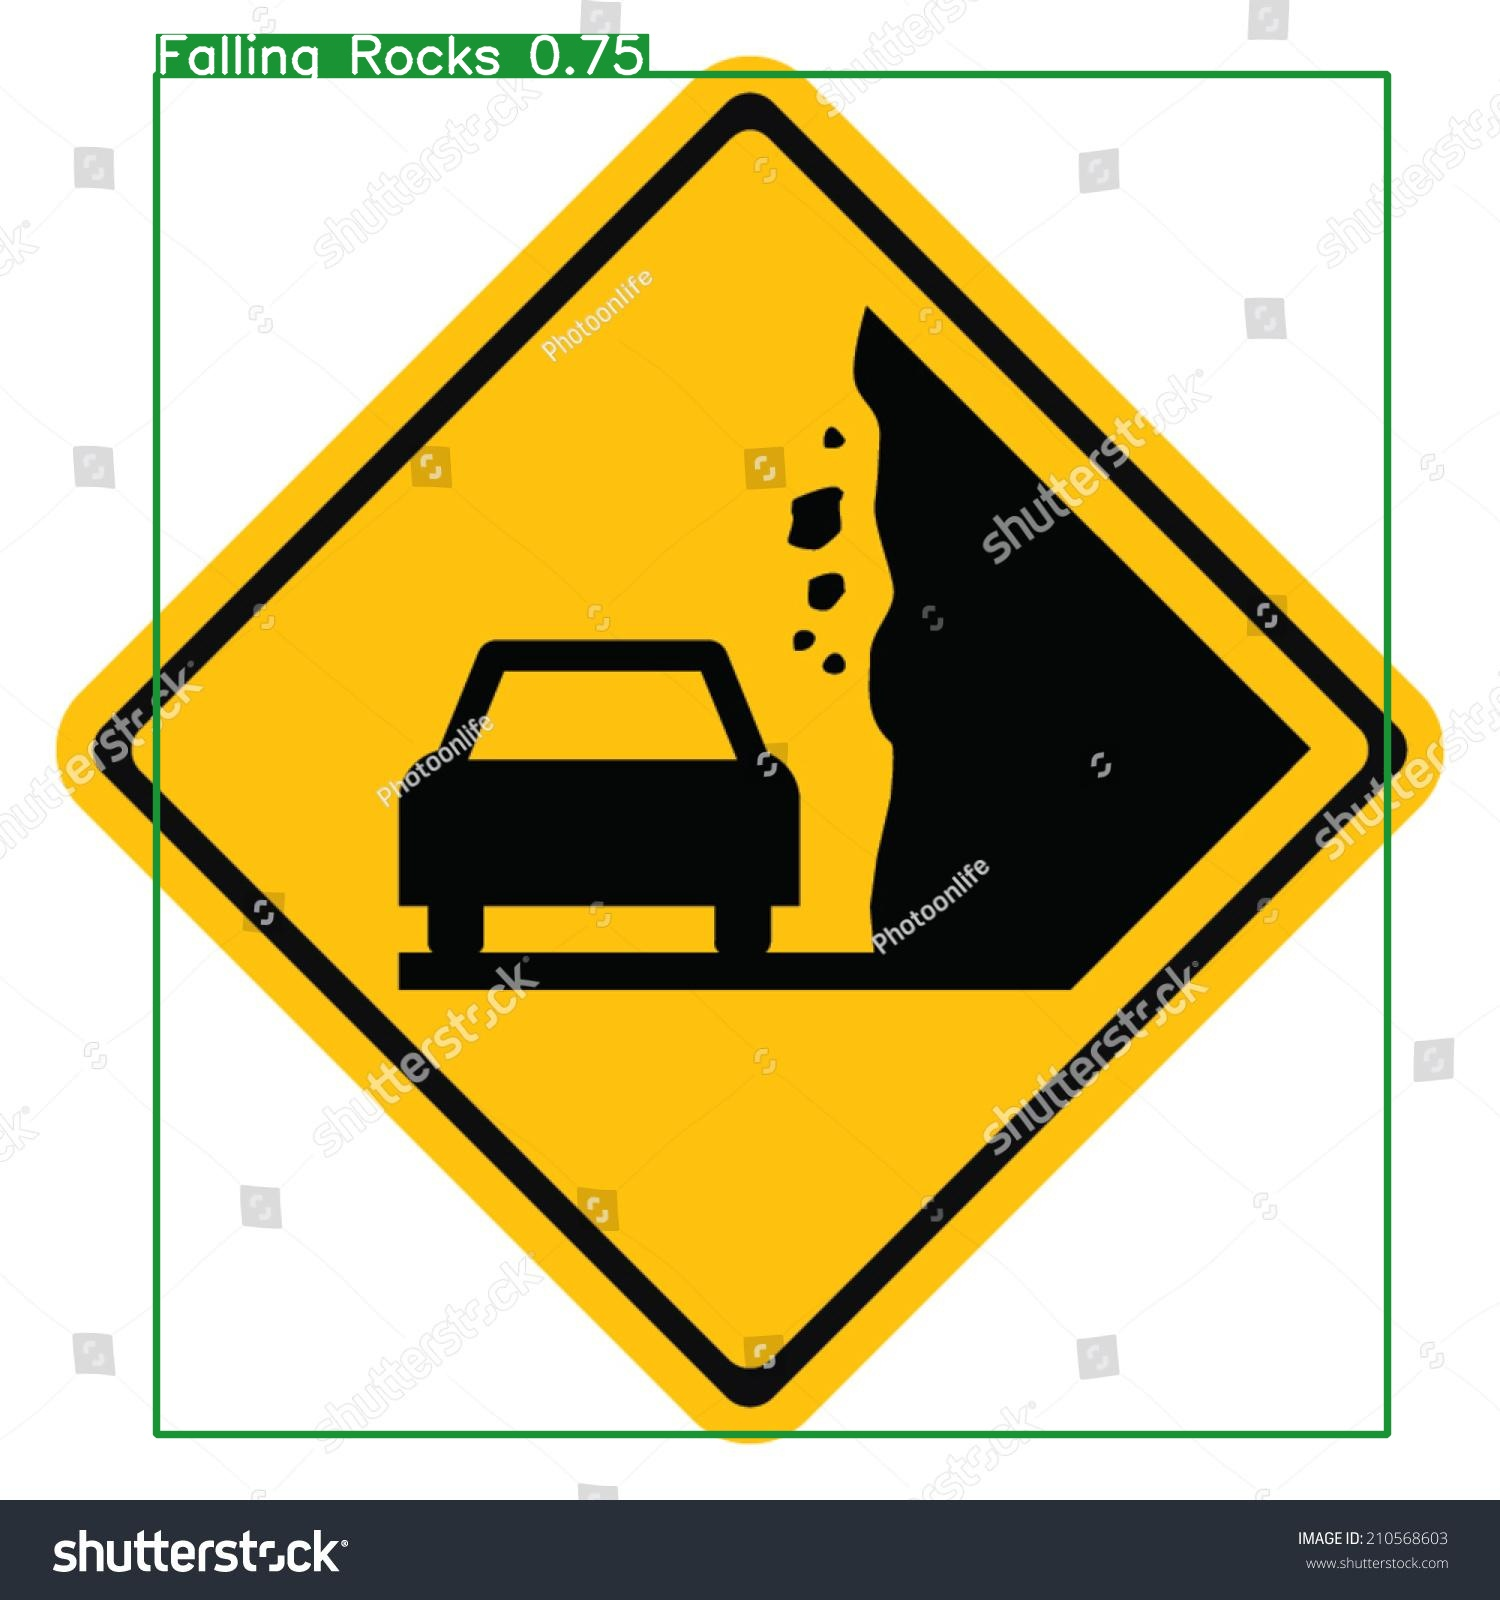

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
  display(Image(filename=image_path, height =600))
  print("\n")